# Linear Discriminant Analysis as a dimensionality reduction technique

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats as stats
%matplotlib notebook
np.set_printoptions(precision=3, suppress=True)

## Activity 1

<IPython.core.display.Javascript object>


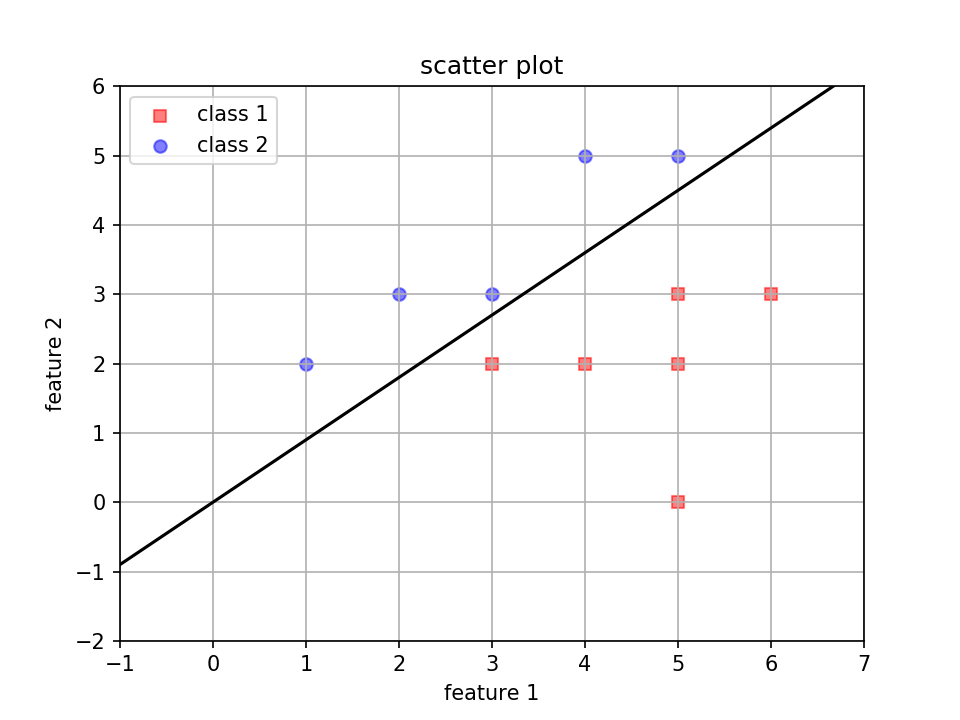

In [2]:
x_p1 = np.array([[1,2],[2,3],[3,3],[4,5],[5,5],[4,2],[5,0],[5,2],[3,2],[5,3],[6,3]])
# x_2_p2 = np.array([[4,2],[5,0],[5,2],[3,2],[5,3],[6,3]])
y_p1 = np.array([1,1,1,1,1,-1,-1,-1,-1,-1,-1])
# y_1_p1 = np.array([])
plt.scatter(x=x_p1[:,0][y_p1 == -1], y=x_p1[:,1][y_p1 == -1], marker='s', color='red', alpha=0.5, label="class 1")
plt.scatter(x=x_p1[:,0][y_p1 == 1], y=x_p1[:,1][y_p1 == 1], marker='o', color='blue', alpha=0.5, label="class 2")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.xlim((-1,7))
plt.ylim((-2,6))
plt.title("scatter plot")
plt.legend(loc='upper left')
plt.grid()
s = np.linspace(-2,10,250)
t = 0.9*s
plt.plot(s,t,"black")

***
## Activity Question 2
***

### Step 0: prepare the data

In [3]:
# Generate data. "random_state" was set to 2 for easy replication 
x_p2, y_p2 = datasets.make_classification(n_samples=150, n_features=3, n_informative=2, n_redundant=0, 
                                          n_repeated=0, n_classes=3, n_clusters_per_class=1, weights=None, 
                                          class_sep=2, random_state=2, scale = 1)

In [5]:
x_p2

array([[-1.169,  1.19 ,  0.946],
       [ 2.117,  1.409, -3.065],
       [ 1.408,  0.586, -1.055],
       [ 2.618,  0.312, -3.06 ],
       [ 2.243, -1.37 , -0.061],
       [ 2.109,  2.102, -1.725],
       [ 1.813,  0.712, -1.496],
       [-2.475, -0.957,  2.964],
       [ 1.785,  0.786, -2.914],
       [ 3.048, -0.132,  3.14 ],
       [-0.272,  0.114, -0.915],
       [ 2.022, -0.221,  2.559],
       [ 2.05 ,  0.748,  0.653],
       [ 1.943,  2.67 , -2.415],
       [ 1.105,  1.451, -1.634],
       [-2.867, -1.056,  2.833],
       [ 1.464, -1.246, -2.291],
       [ 2.44 ,  0.708,  4.545],
       [ 2.372, -0.677, -3.061],
       [-2.088, -0.496,  2.611],
       [-0.009, -0.209,  2.396],
       [ 2.993, -0.165,  2.379],
       [-1.85 , -0.183,  1.71 ],
       [ 2.546,  0.549, -1.347],
       [-1.972, -0.708,  2.316],
       [-1.461, -0.255,  1.335],
       [-1.361,  0.187,  1.701],
       [-1.952, -0.158,  1.538],
       [ 2.926, -0.883,  1.573],
       [ 2.681, -0.997, -2.252],
       [-2

In [7]:
y_p2

array([2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1,
       2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0,
       1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2,
       0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1,
       0, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1])

In [9]:
x_p2[:,0][y_p2 == 0]

array([2.117, 1.408, 2.618, 2.243, 2.109, 1.813, 1.785, 2.05 , 1.943,
       1.105, 1.464, 2.372, 2.546, 2.681, 1.843, 1.283, 1.017, 2.039,
       2.019, 1.936, 2.255, 1.672, 1.771, 2.045, 2.631, 1.323, 1.607,
       2.359, 2.806, 1.564, 1.444, 1.901, 2.732, 1.834, 1.601, 2.191,
       2.913, 2.461, 2.402, 2.954, 2.092, 2.156, 2.256, 1.402, 2.692,
       2.257, 2.199, 2.175, 2.567, 2.252])

<IPython.core.display.Javascript object>


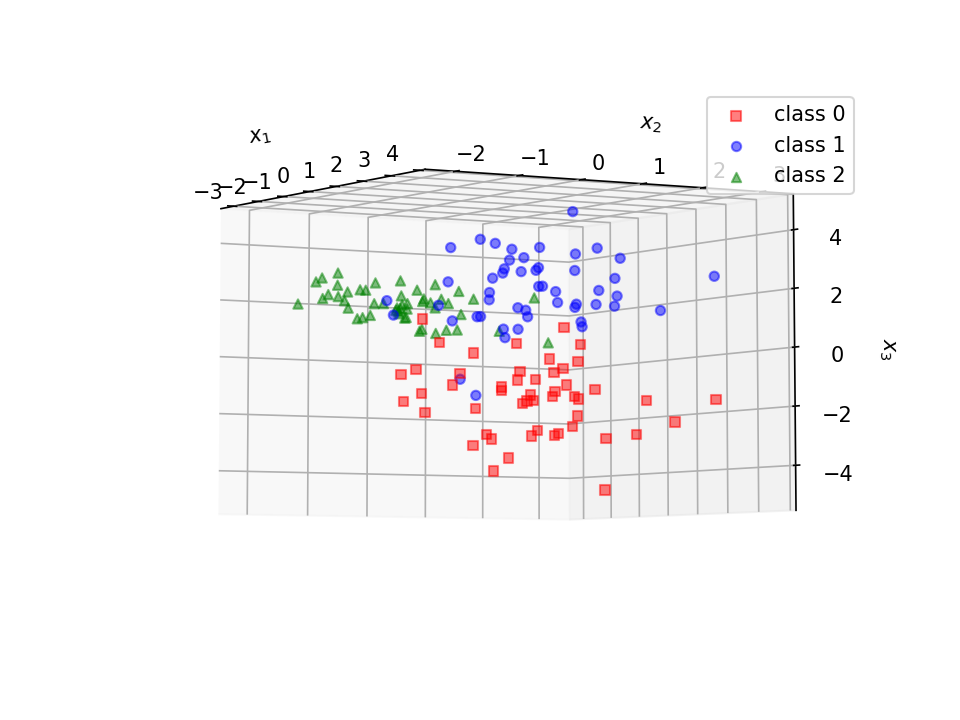

In [4]:
# Visualize the generated data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=x_p2[:,0][y_p2 == 0], ys=x_p2[:,1][y_p2 == 0], zs=x_p2[:,2][y_p2 == 0],  
           marker='s', color='red', alpha=0.5, label="class 0")
ax.scatter(xs=x_p2[:,0][y_p2 == 1], ys=x_p2[:,1][y_p2 == 1], zs=x_p2[:,2][y_p2 == 1],  
           marker='o', color='blue', alpha=0.5, label="class 1")
ax.scatter(xs=x_p2[:,0][y_p2 == 2], ys=x_p2[:,1][y_p2 == 2], zs=x_p2[:,2][y_p2 == 2],  
           marker='^', color='green', alpha=0.5, label="class 2")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.legend()
plt.show()

In [10]:
# Split the data according to different classes. 
# note that the classes are {0,1,2}, not {1,2,3}
x_p2_c0 = x_p2[:,:][y_p2 == 0]
x_p2_c1 = x_p2[:,:][y_p2 == 1]
x_p2_c2 = x_p2[:,:][y_p2 == 2]

In [11]:
tmp = np.hstack((x_p2,y_p2.reshape(150,1)))
# tmp

### Step 1: calculate the mean of the each class

In [137]:
mu_c0 = np.mean(x_p2_c0,axis=0)
mu_c1 = np.mean(x_p2_c1,axis=0)
mu_c2 = np.mean(x_p2_c2,axis=0)
mu = np.mean(x_p2, axis=0)
n_0 = x_p2_c0.shape[0]
n_1 = x_p2_c1.shape[0]
n_2 = x_p2_c2.shape[0]

In [138]:
print("Mean of class 0 is",mu_c0, "\nMean of class 1 is", mu_c1, "\nMean of class 2 is", mu_c2, "\nMean of all data", mu)

Mean of class 0 is [ 2.058  0.184 -1.759] 
Mean of class 1 is [1.86  0.3   1.868] 
Mean of class 2 is [-1.858 -0.172  1.844] 
Mean of all data [0.687 0.104 0.651]


In [139]:
print(n_0,n_1,n_2)

50 50 50


### Step 2: Calculate the Between-Class Variance matrix $S_B$.

Recall that the formula to calculate $S_B$ is:
$$S_{B} = \sum_{j=0}^{k-1}n_j(\vec{\mu_j}-\vec{\mu})(\vec{\mu_j}-\vec{\mu})^T$$

In [140]:
S_B_0 = (mu_c0 - mu).reshape((3,1)) @ (mu_c0 - mu).reshape((1,3))
S_B_1 = (mu_c1 - mu).reshape((3,1)) @ (mu_c1 - mu).reshape((1,3))
S_B_2 = (mu_c2 - mu).reshape((3,1)) @ (mu_c2 - mu).reshape((1,3))
S_B = n_0 * S_B_0 + n_1 * S_B_1 + n_2 * S_B_2

In [141]:
S_B_0

array([[ 1.881,  0.11 , -3.305],
       [ 0.11 ,  0.006, -0.193],
       [-3.305, -0.193,  5.809]])

In [142]:
(mu_c0-mu).reshape(3,1)@(mu_c0-mu).reshape(3,1).T

array([[ 1.881,  0.11 , -3.305],
       [ 0.11 ,  0.006, -0.193],
       [-3.305, -0.193,  5.809]])

### Step 3: Calculate the Within-Class Variance matrix $S_W$

Recall that the formula to calculate $S_W$ is:
$$S_{W_j} = \sum_{\vec{x}^{(i)} \in C_j}(\vec{x}^{(i)}-\vec{\mu_j})(\vec{x}^{(i)}-\vec{\mu_j})^T,\ j=0,1,2$$
$$S_W = \sum_{j = 0}^{2}S_{W_j}$$

In [143]:
(x_p2_c1 - mu_c1).T @ (x_p2_c1 - mu_c1)

array([[56.4  , -1.461, 28.102],
       [-1.461, 44.18 , -0.449],
       [28.102, -0.449, 59.364]])

In [144]:
# Calculate 
S_W_0 = (x_p2_c0 - mu_c0).T@(x_p2_c0 - mu_c0)
S_W_1 = (x_p2_c1 - mu_c1).T@(x_p2_c1 - mu_c1)
S_W_2 = (x_p2_c2 - mu_c2).T@(x_p2_c2 - mu_c2)
S_W = S_W_0 + S_W_1 + S_W_2

In [145]:
S_w_0_1 = np.zeros((3,3))
for i in range(50):
    m = (x_p2_c0[i,:] - mu_c0).reshape((3,1))
    S_w_0_1 += m@m.T
S_w_0_1 

S_w_1_1 = np.zeros((3,3))
for i in range(50):
    m = (x_p2_c1[i,:] - mu_c1).reshape((3,1))
    S_w_1_1 += m@m.T
S_w_1_1  

S_w_2_1 = np.zeros((3,3))
for i in range(50):
    m = (x_p2_c2[i,:] - mu_c2).reshape((3,1))
    S_w_2_1 += m@m.T
S_w_2_1 

array([[ 15.865,  -0.187, -15.45 ],
       [ -0.187,  37.596,  -2.348],
       [-15.45 ,  -2.348,  18.132]])

In [146]:
S_w_0_1

array([[11.089, -0.048, -8.107],
       [-0.048, 60.373, -7.092],
       [-8.107, -7.092, 71.54 ]])

In [147]:
S_W_0

array([[11.089, -0.048, -8.107],
       [-0.048, 60.373, -7.092],
       [-8.107, -7.092, 71.54 ]])

In [148]:
S_W

array([[ 83.355,  -1.695,   4.545],
       [ -1.695, 142.149,  -9.89 ],
       [  4.545,  -9.89 , 149.036]])

### Step 4:  Find the eigenvectors and eigenvalues of matrix $S_W^{-1}S_B$

In [149]:
W = np.linalg.inv(S_W)@S_B
eig_vals, eig_vecs = np.linalg.eig(W)

In [150]:
eig_vecs

array([[ 0.92 ,  0.573, -0.126],
       [ 0.036,  0.142,  0.991],
       [-0.391,  0.807, -0.039]])

In [151]:
eig_vals

array([7.288, 1.719, 0.   ])

In [152]:
for i in range(len(eig_vals)):
    np.testing.assert_array_almost_equal(W@eig_vecs[:,i].reshape((3,1)), 
                                         (eig_vals[i] * eig_vecs[:,i]).reshape((3,1)), decimal=6)
    
print("PASS")

PASS


### Step 5: Sort the eigenvectors by decreasing eigenvalues, and select top $r$ eigenvectors to construct a $r$-dimensional subspace

In [153]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k:k[0], reverse=True)

In [294]:
for i in range(len(eig_pairs)):
    print("Eigenvalue:",eig_pairs[i][0].round(3), "; the corresponding eigenvector:", eig_pairs[i][1], "\n")

Eigenvalue: 7.288 ; the corresponding eigenvector: [ 0.92   0.036 -0.391] 

Eigenvalue: 1.719 ; the corresponding eigenvector: [0.573 0.142 0.807] 

Eigenvalue: 0.0 ; the corresponding eigenvector: [-0.126  0.991 -0.039] 



The best 1-dimensional subspace is [0.923,  0.055, -0.382], and the best 2-dimensional subspace is span({[0.923,  0.055, -0.382], [0.554, 0.173, 0.814]})

### Step 6: Transform the data points onto the new subspace.

In [281]:
%matplotlib inline
def visualize_1D_linear_discriminant(ld1, y, n_class, color=["red", "blue", "green"], marker=["s","o","^"]):
    for i in range(n_class):
        plt.scatter(ld1[y == i], np.zeros_like(ld1[y == i]), marker=marker[i], color=color[i], alpha=0.5, label="class {0}".format(i))
        mean = np.mean(ld1[y == i])
        std = np.std(ld1[y == i])
        a = np.linspace(mean - 3*std, mean + 3*std, 100)
        plt.plot(a, stats.norm.pdf(a, mean, std), color = color[i])
        plt.scatter(mean, 0, color="black", marker=marker[i], s=90, label="m_{0}".format(i))
#     plt.xlim((-6,6))
    plt.legend()
    plt.show()
    plt.close()
    
def visualize_2D_linear_discriminants(ld1, y, n_class, color=["red", "blue", "green"], marker=["s","o","^"]):
    for i in range(n_class):
        plt.scatter(ld1[:,0][y == i], ld1[:,1][y == i], marker=marker[i], color=color[i], alpha=0.5, label="class {0}".format(i))
        mean = np.mean(ld1[y == i], axis = 0)
#         std = np.std(ld1[y == i])
#         a = np.linspace(mean - 3*std, mean + 3*std, 100)
#         plt.plot(a, stats.norm.pdf(a, mean, std), color = color[i])
        plt.scatter(mean[0], mean[1], color="black", marker=marker[i], s=70, label="m_{0}".format(i))
    mean = np.mean(ld1, axis = 0)
    plt.scatter(mean[0], mean[1], color="black", marker="x", s=70, label="m")
#     plt.xlim((-6,6))
#     plt.ylim((-6,6))
    plt.legend()
    plt.show()
    plt.close()

### 1 dimensional:

#### Project on the first eigenvector

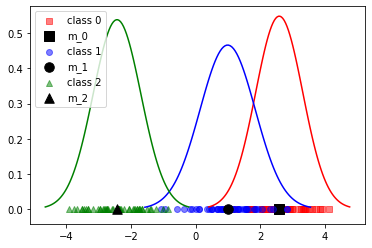

In [282]:
w_best = eig_pairs[0][1].reshape((3,1))
x_p2_best_1d = x_p2@w_best
visualize_1D_linear_discriminant(x_p2_best_1d, y_p2,3)

#### Project on the second eigenvector

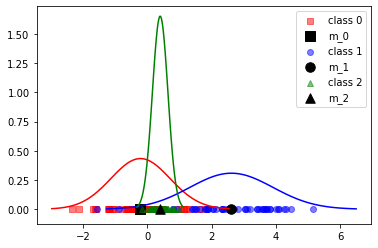

In [283]:
w_second = eig_pairs[1][1].reshape((3,1))
x_p2_second_1d = x_p2@w_second
x_p2_second_1d
visualize_1D_linear_discriminant(x_p2_second_1d, y_p2,3)

#### Project on a arbitrary eigenvector

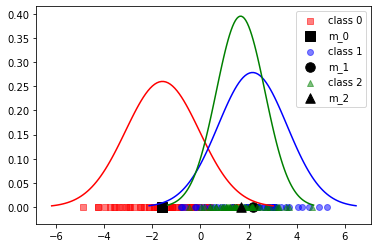

In [284]:
# An arbitrary vector w_arbi. You can change this vector and explore. 
# ** Cautious: the scale of the x-axis may change **
w_arbi = np.array([[0],[1],[1]])
x_p2_arbi_1d = x_p2@w_arbi
visualize_1D_linear_discriminant(x_p2_arbi_1d, y_p2,3)

### 2 dimensional:

#### Project on the span of first two eigenvectors

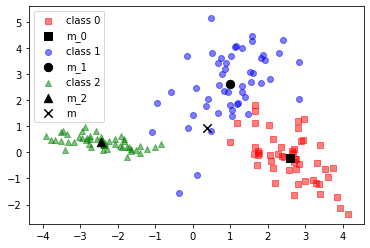

In [285]:
W_best_2d = np.hstack((eig_pairs[0][1].reshape((3,1)), eig_pairs[1][1].reshape((3,1))))
x_p2_best_2d = x_p2@W_best_2d
visualize_2D_linear_discriminants(x_p2_best_2d, y_p2, 3)

#### Project on the span of two arbitrary linearly independent vectors

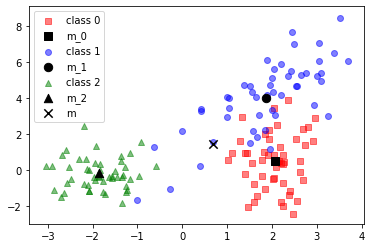

In [286]:
# An arbitrary matrix W_arbi_2d. You can change this vector and explore. 
# ** Cautious: the scale of the x-axis and y-axis may change **
W_arbi_2d = np.array([[1,1],[0,1],[0,1]])
x_p2_arbi_2d = x_p2@W_arbi_2d
visualize_2D_linear_discriminants(x_p2_arbi_2d, y_p2, 3)

## Activity 3 

### Set Up

In [299]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
x_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
klass = iris.target_names
X.shape, y.shape

((150, 4), (150,))

In [300]:
label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=1)
print(xtrain.shape)

xtrain_normalized = normalize(xtrain, norm='l2', axis=0)
xtest_normalized = normalize(xtest, norm='l2', axis=0)

(112, 4)


In [343]:
%matplotlib inline
def plot2d(X, y, xlab='PC1', ylab='PC2', title='PCA: first 2 principal components'):
    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label],
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label] )
        mean = np.mean(X[:,:][y == label], axis = 0)
        plt.scatter(x=mean[0],y=mean[1],
                    marker=marker,
                    color="black",
                    s=80,
                    alpha=1)

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    leg = plt.legend(loc=0, fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

In [305]:
def evaluate_model(model, xtrain, ytrain, xtest, ytest, model_name):
    pred_train = model.predict(xtrain)
    err_train = np.mean(pred_train != ytrain)
    print("The error rate for training set using {:} (r=2) is {:.3f}%".format(model_name, err_train*100))
    
    pred_test = model.predict(xtest)
    err_test = np.mean(pred_test != ytest)
    print("The error rate for test set using {:} (r=2) is {:.3f}%".format(model_name, err_test*100))

### Method 1: Two Most Significant Features

We find the most significant features by directly do linear regression on the dataset, and pick the two features with greatest absolute weight. 

*Note* that this is not a good way of selecting features in the sense for classification tasks, since 1) the selected features are important for regression but ignores the labels; 2) the select features are original features, whereas PCA and LDA are able to combine different features to form new features; and 3) the select features may be correlated, where as PCA and LDA provides orthogonal features.

We just want to include this crude method to give you a sense of dimensionality reduction

In [306]:
w = np.linalg.inv(xtrain.T@xtrain)@xtrain.T@ytrain
w

array([-0.16 ,  0.051,  0.329,  0.463])

In [307]:
xtrain_truncated = xtrain[:, 2:]
xtest_truncated = xtest[:, 2:]
print(xtrain_truncated.shape)

(112, 2)


(37, 2)
(34, 2)
(41, 2)


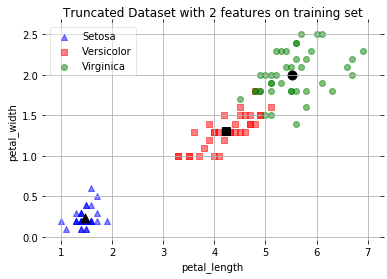

In [342]:
plot2d(xtrain_truncated, ytrain, x_columns[2], x_columns[3], 'Truncated Dataset with 2 features on training set')

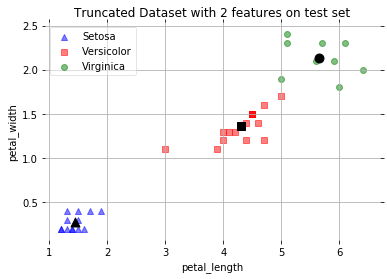

In [344]:
plot2d(xtest_truncated, ytest, x_columns[2], x_columns[3], 'Truncated Dataset with 2 features on test set')

In [315]:
lr_truncated = LogisticRegression(solver='liblinear', multi_class='auto')
lr_truncated.fit(xtrain_truncated, ytrain)
evaluate_model(lr_truncated, xtrain_truncated, ytrain, xtest_truncated, ytest, "Truncated X")

The error rate for training set using Truncated X (r=2) is 20.536%
The error rate for test set using Truncated X (r=2) is 31.579%


### Method 2: PCA

We use PCA to form two most important features.

In [316]:
pca = PCA(n_components=2)
xtrain_pca = pca.fit_transform(xtrain_normalized)
xtest_pca = pca.transform(xtest_normalized)

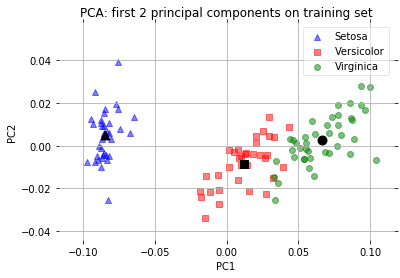

In [345]:
plot2d(xtrain_pca, ytrain, title = 'PCA: first 2 principal components on training set' )

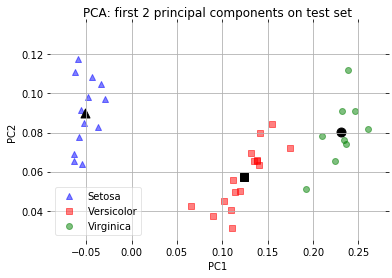

In [346]:
plot2d(xtest_pca, ytest, title = 'PCA: first 2 principal components on test set')

In [320]:
lr_pca = LogisticRegression(solver='liblinear', multi_class='auto')
lr_pca.fit(xtrain_pca, ytrain)
evaluate_model(lr_pca, xtrain_pca, ytrain, xtest_pca, ytest, "PCA")

The error rate for training set using PCA (r=2) is 30.357%
The error rate for test set using PCA (r=2) is 42.105%


### 3) LDA

In [349]:
 ### Using self defined predictor

In [19]:
# lda = LinearDiscriminantAnalysis(n_components=2)
# xtrain_lda_fit = lda.fit(xtrain_normalized, ytrain.reshape(-1, ))
# xtrain_lda_fit

In [18]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 2))
# sns.heatmap(pd.DataFrame(xtrain_lda_fit.coef_,
#                          columns=[i for i in range(1, 5)], 
#                          index=klass), 
#             ax=ax, cmap=sns.diverging_palette(240,10,as_cmap=True), annot=True)
# plt.suptitle('LDA Feature Coefficients')
# None

In [17]:
# pred_train_lda = lda.predict(xtrain_normalized)
# err_train_lda = np.mean(pred_train_lda != ytrain)
# print("The error rate for training set using LDA (r=2) is {:.3f}%".format(err_train_lda*100))
# pred_test_lda = lda.predict(xtest_normalized)
# err_test_lda = np.mean(pred_test_lda != ytest)
# print("The error rate for test set using LDA (r=2) is {:.3f}%".format(err_test_lda*100))
# evaluate_model(xtrain_lda_fit, xtrain_normalized, ytrain, xtest_normalized, ytest, "LDA")

In [350]:
### Using LR 

We use LDA to form two most important features.

In [321]:
lda2 = LinearDiscriminantAnalysis(n_components=2, store_covariance=True)
xtrain_lda2 = lda2.fit_transform(xtrain_normalized, ytrain)
xtest_lda2 = lda2.fit_transform(xtest_normalized, ytest)

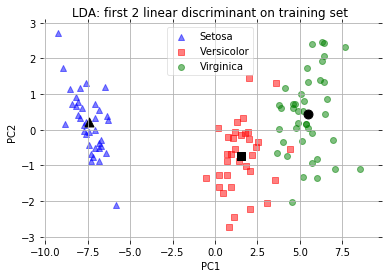

In [347]:
plot2d(xtrain_lda2, ytrain, title='LDA: first 2 linear discriminant on training set')

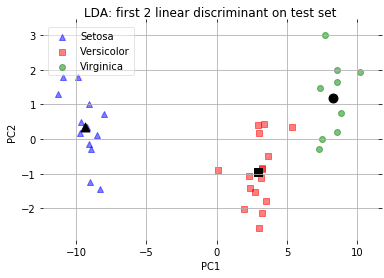

In [348]:
plot2d(xtest_lda2, ytest, title='LDA: first 2 linear discriminant on test set')

In [326]:
lr_lda = LogisticRegression(solver='liblinear', multi_class='auto')
lr_lda.fit(xtrain_lda2, ytrain)
evaluate_model(lr_lda, xtrain_lda2, ytrain, xtest_lda2, ytest, "LDA")

The error rate for training set using LDA (r=2) is 4.464%
The error rate for test set using LDA (r=2) is 13.158%


## Reference
- https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html